In [3]:
#Algorithm process is like that ...
#Checking the point that already exist when we add a new point
#Founding the K neighbour points
#It's accepted according to most common neighbour point group

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabetic
# Outcome = 0 Fit
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


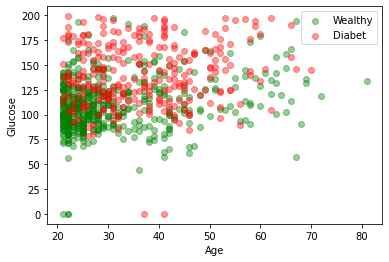

In [5]:

#Filtring
Diabetics = data[data.Outcome == 1]
Fits = data[data.Outcome == 0]


plt.scatter(Fits.Age, Fits.Glucose, color="green", label="Healthy", alpha = 0.4)
plt.scatter(Diabetics.Age, Diabetics.Glucose, color="red", label="Diabet", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [7]:
#When values divided far from too many distances , it harder to create euclid's triangle method
# so we using the normalization method.


y = data.Outcome.values
x_basedata = data.drop(["Outcome"],axis=1)   
# Rebuilding outcome axis to dependent variable because willing normalizate the other values
# its change the values beetween 0 and 1 


x = (x_basedata - np.min(x_basedata))/(np.max(x_basedata)-np.min(x_basedata))


print("The Values before the normalization:\n")
print(x_basedata.head())



print("\n\n\n The values after normalization for the KNN Train-Test:\n")
print(x.head())
    



The Values before the normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



 The values after normalization for the KNN Train-Test:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598 

In [10]:
# Dividing train data and test data
# Train Data --> Detection (sick)patients and healthy people with machine learning
# Test Data --> Our machine learn detect %? with truth ?

#Dividing test and train values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

#Classification of KNN model.
counter = 1
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    print(counter, "  ", "Accuracy Rate: %", knn.score(x_test,y_test)*100)
    counter += 1

1    Doğruluk oranı: % 71.42857142857143
2    Doğruluk oranı: % 71.42857142857143
3    Doğruluk oranı: % 83.11688311688312
4    Doğruluk oranı: % 80.51948051948052
5    Doğruluk oranı: % 81.81818181818183
6    Doğruluk oranı: % 83.11688311688312
7    Doğruluk oranı: % 80.51948051948052
8    Doğruluk oranı: % 80.51948051948052
9    Doğruluk oranı: % 79.22077922077922
10    Doğruluk oranı: % 79.22077922077922
